# Subspace Digital Twin, Parameter Selection Under Uncertainty

*BlockScience, April 2024*

Here we execute the PSUU framework for the subspace economic model. 

For more information see the methodology document by Danilo: https://hackmd.io/iFeP7NemRH--KtWbPP_W0w?view

## Part 1. Architecture Overview

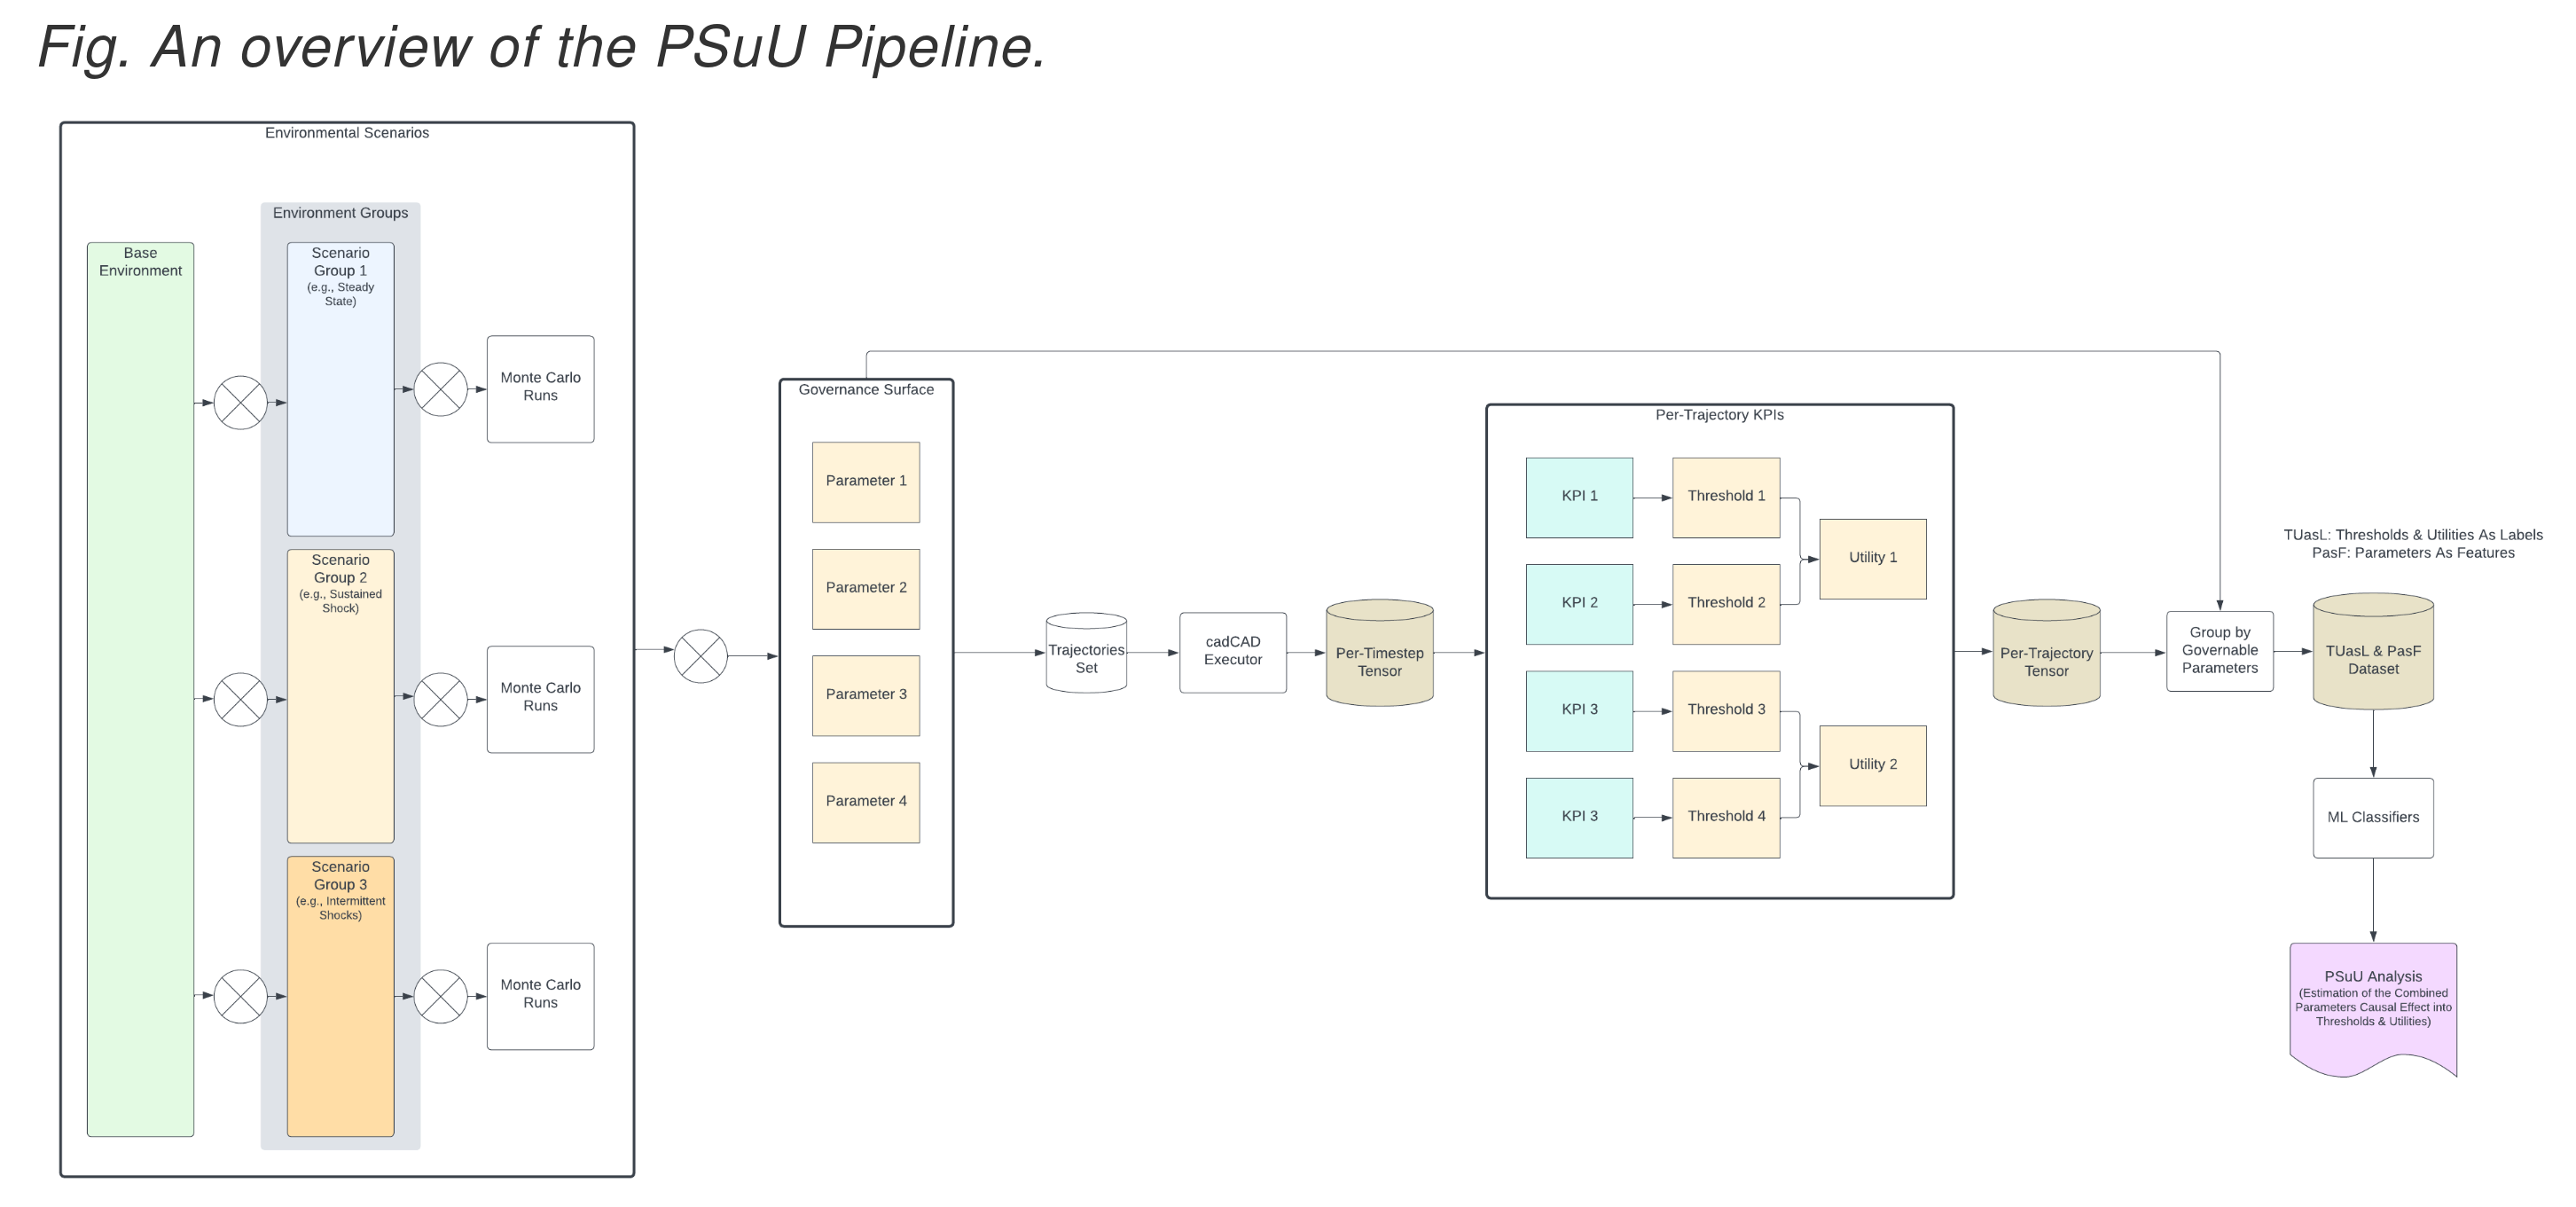

## Part 2. Loading and Cleaning the Per-Timestep Tensor

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import sys
sys.path.append('../../')

from glob import glob

latest = sorted(glob("../../data/simulations/psuu-2024*"))[-1]

sim_df = pd.read_pickle(latest, compression='gzip')

from subspace_model.psuu import timestep_tensor_to_trajectory_tensor, GOVERNANCE_SURFACE_PARAMS
agg_df = timestep_tensor_to_trajectory_tensor(sim_df).reset_index()

In [2]:
agg_df.set_index(GOVERNANCE_SURFACE_PARAMS).describe()

,simulation,subset,run,mean_relative_community_owned_supply,mean_farmer_subsidy_factor,mean_proposing_rewards_per_newly_pledged_space,mean_proposer_reward_minus_voter_reward,cumm_rewards_before_1yr,abs_sum_storage_fees_per_sum_compute_fees,cumm_rewards
count,100.0,100.000000,100.000000,100.000000,0.0,100.0,100.0,1.000000e+02,100.0,1.000000e+02
mean,0.0,49.500000,10.500000,1.174312,NaN,0.0,0.0,1.398096e+06,0.0,2.685110e+06
std,0.0,29.011492,5.795331,0.000242,NaN,0.0,0.0,8.459201e+05,0.0,1.624632e+06
min,0.0,0.000000,1.000000,1.173960,NaN,0.0,0.0,5.255978e+05,0.0,1.009438e+06
25%,0.0,24.750000,5.750000,1.174185,NaN,0.0,0.0,5.256038e+05,0.0,1.009444e+06
50%,0.0,49.500000,10.500000,1.174260,NaN,0.0,0.0,1.576796e+06,0.0,3.028316e+06
75%,0.0,74.250000,15.250000,1.174562,NaN,0.0,0.0,1.839600e+06,0.0,3.533040e+06
max,0.0,99.000000,20.000000,1.174562,NaN,0.0,0.0,2.628006e+06,0.0,5.047206e+06


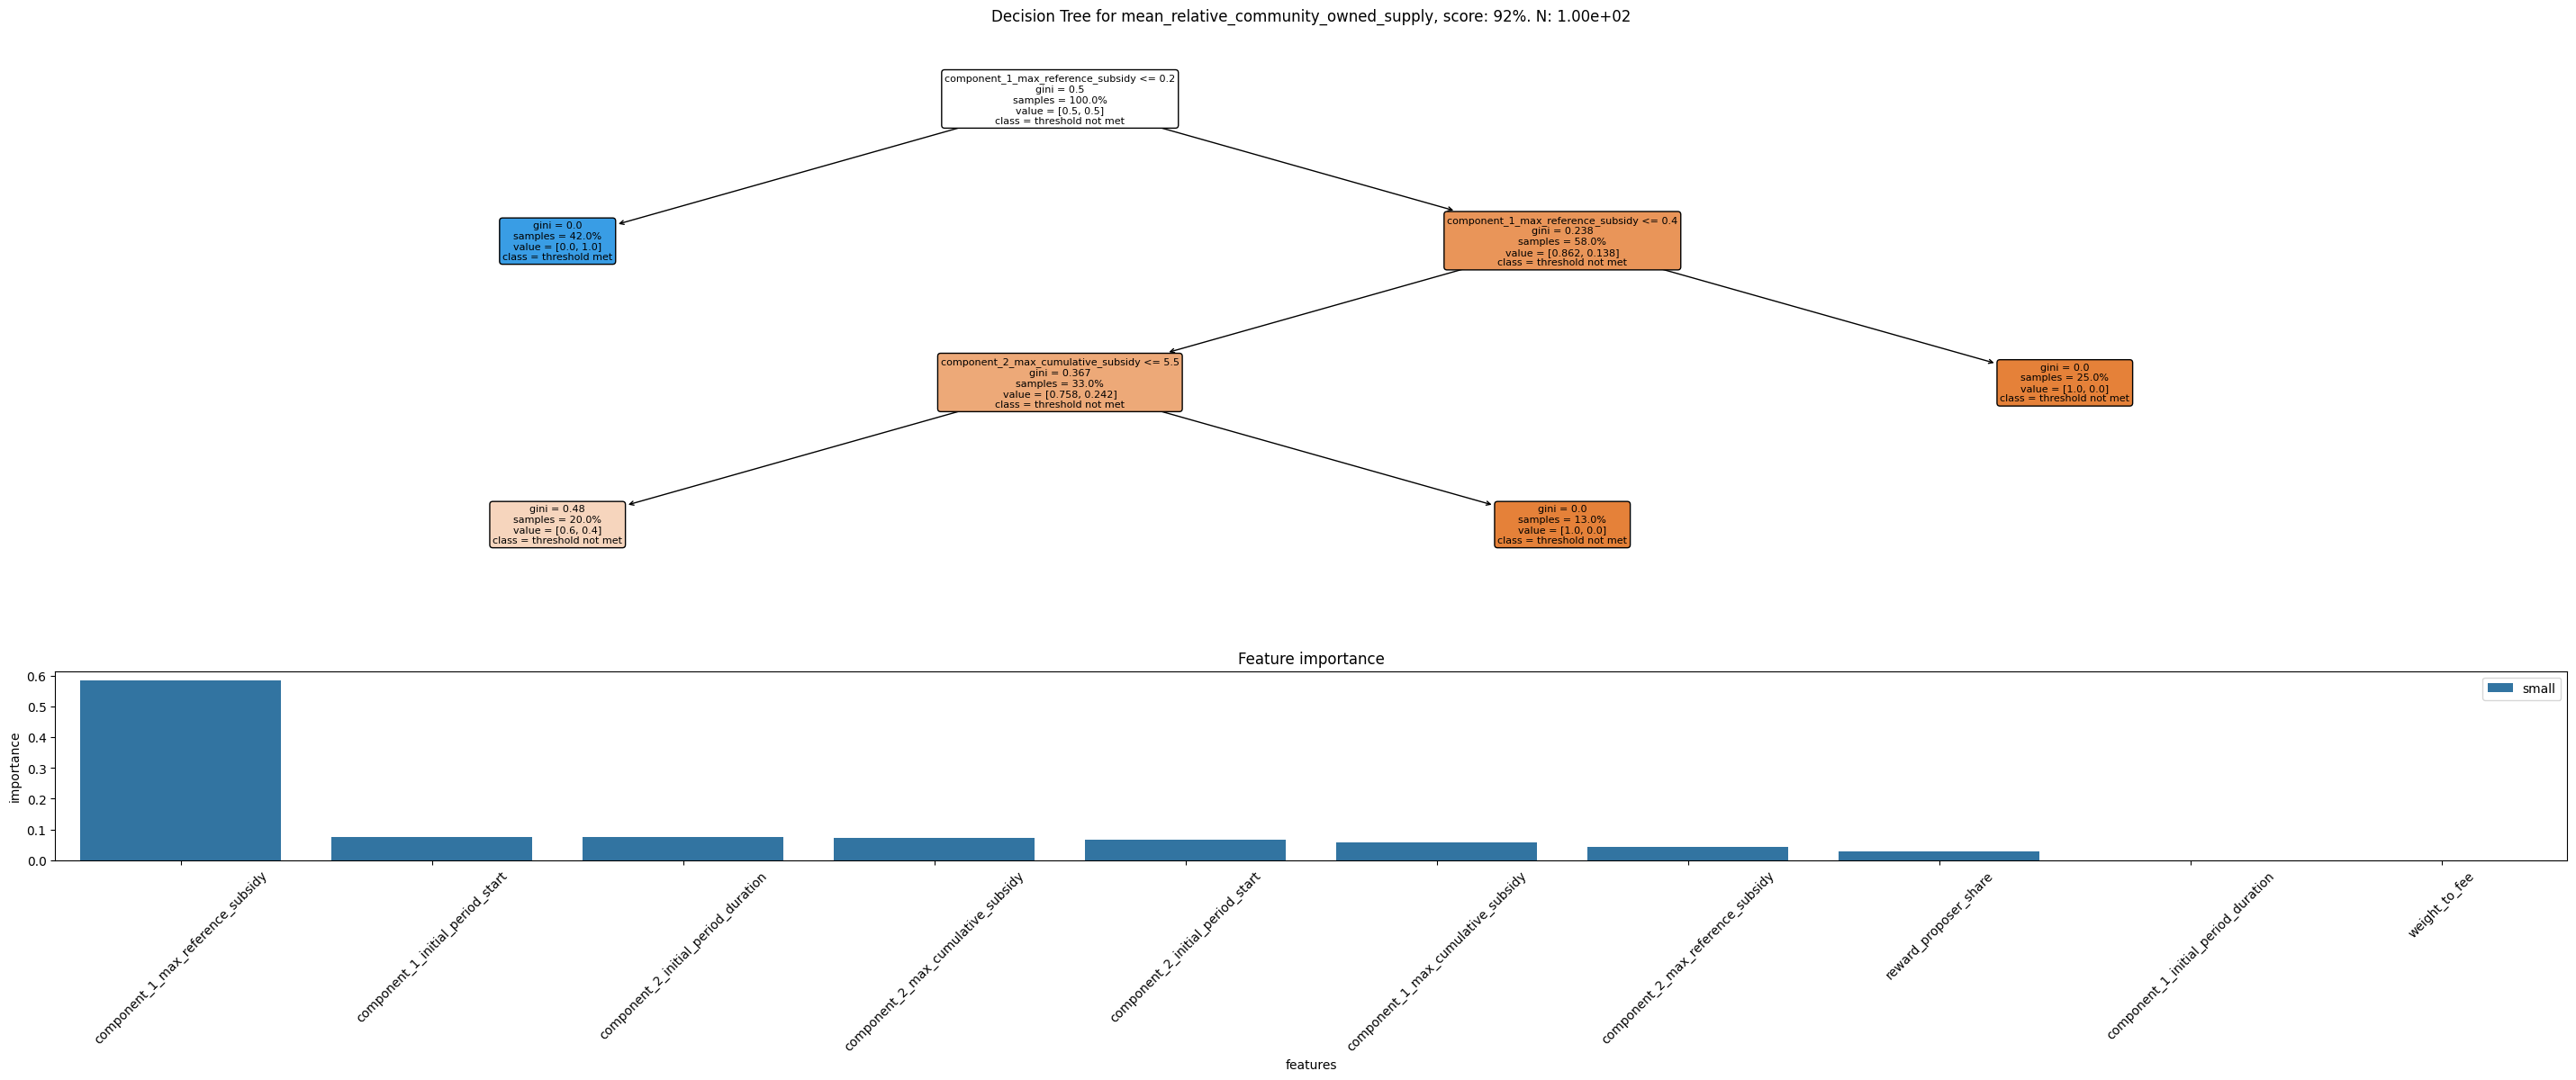

/Users/danlessa/repos/bsci/subspace/env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


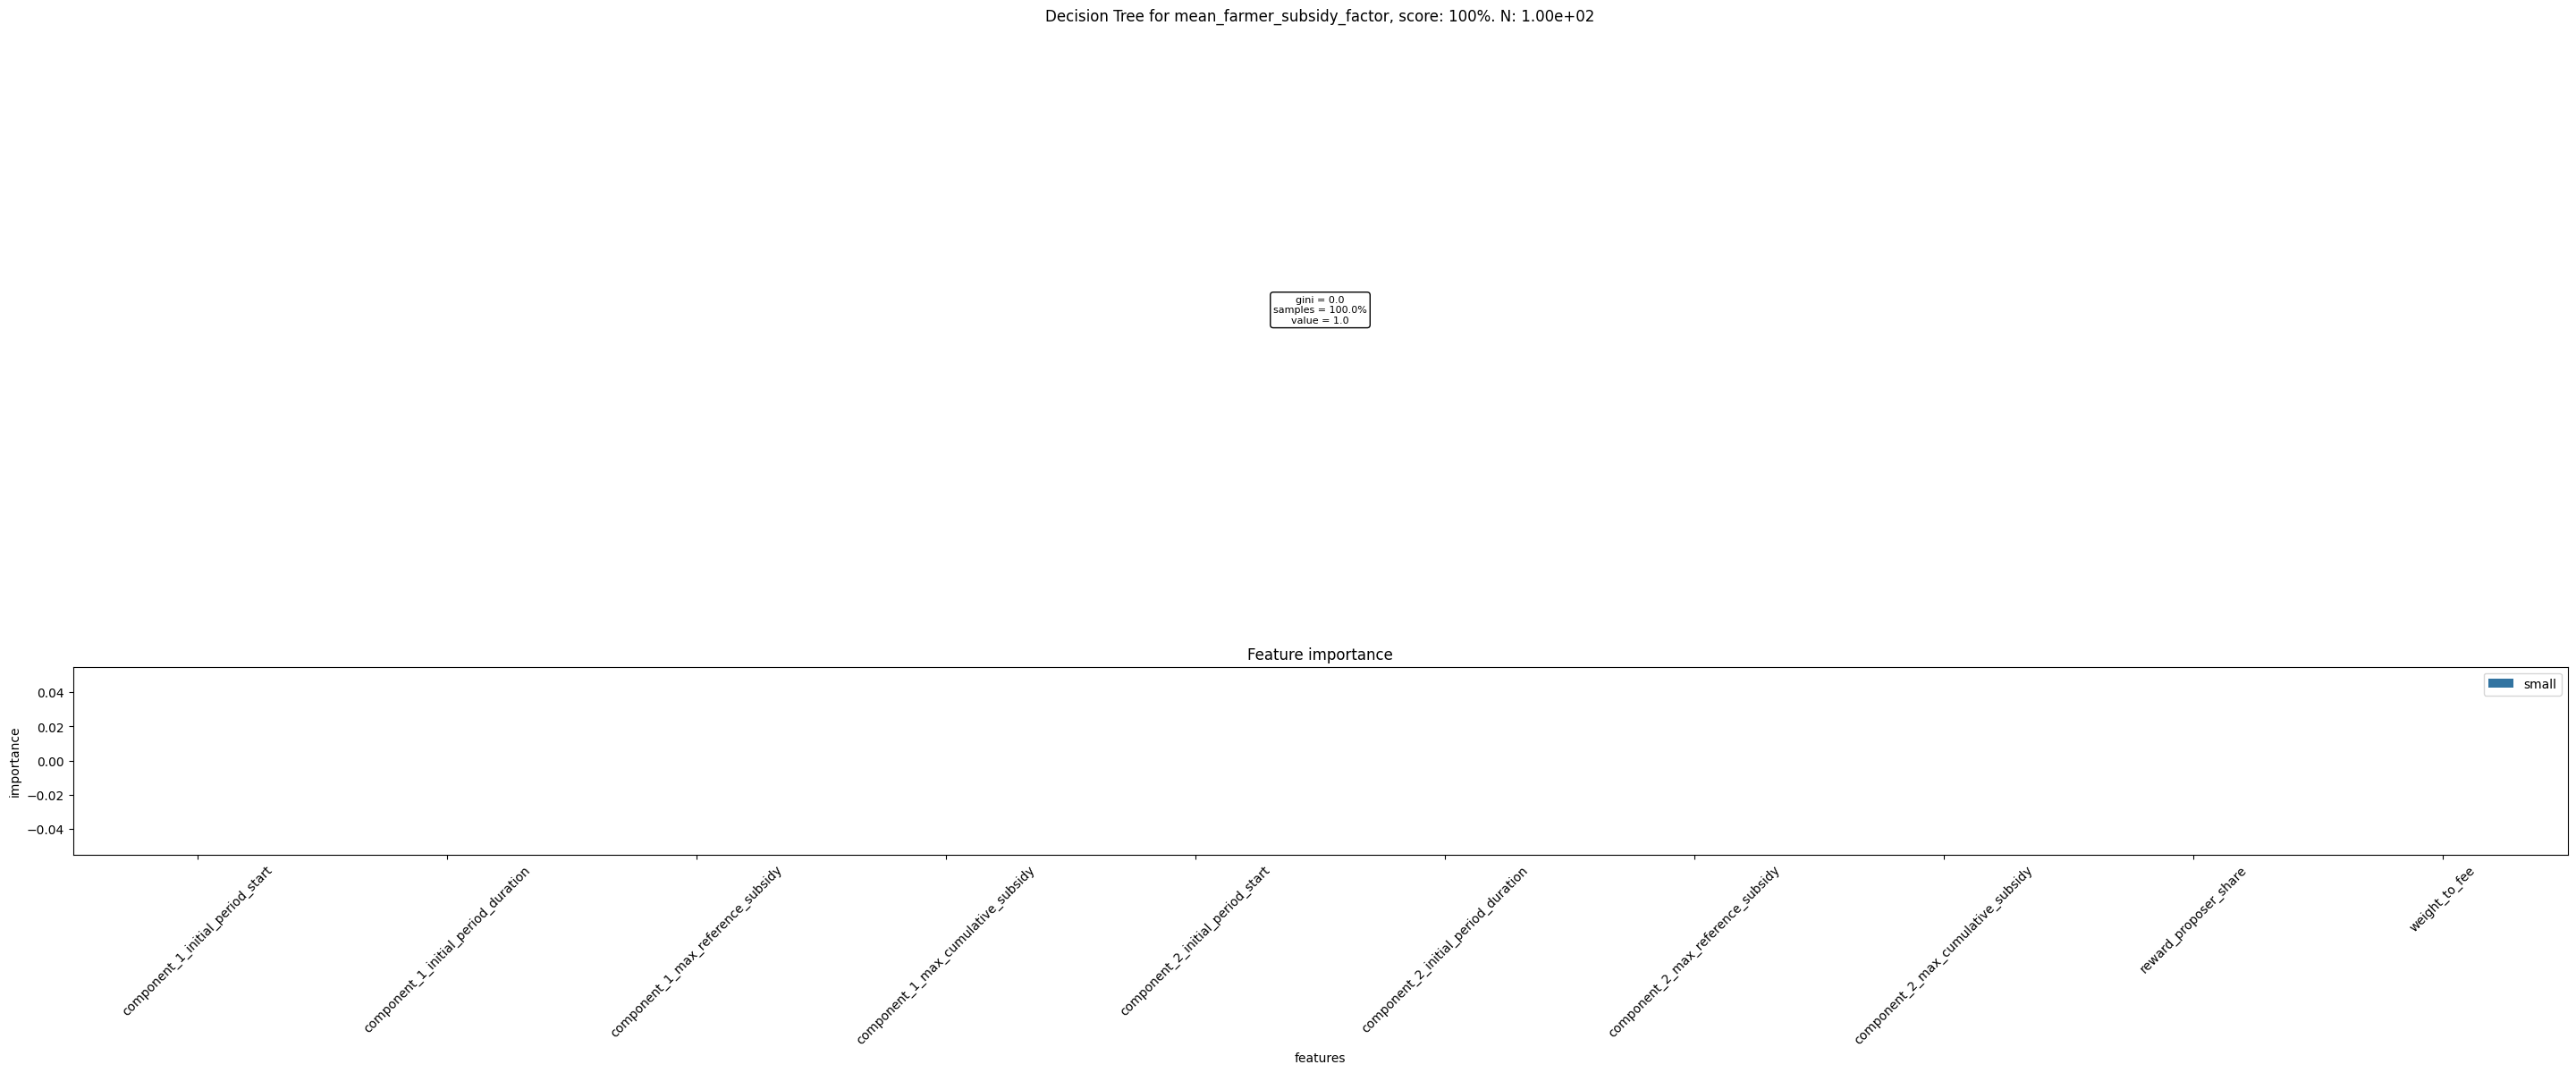

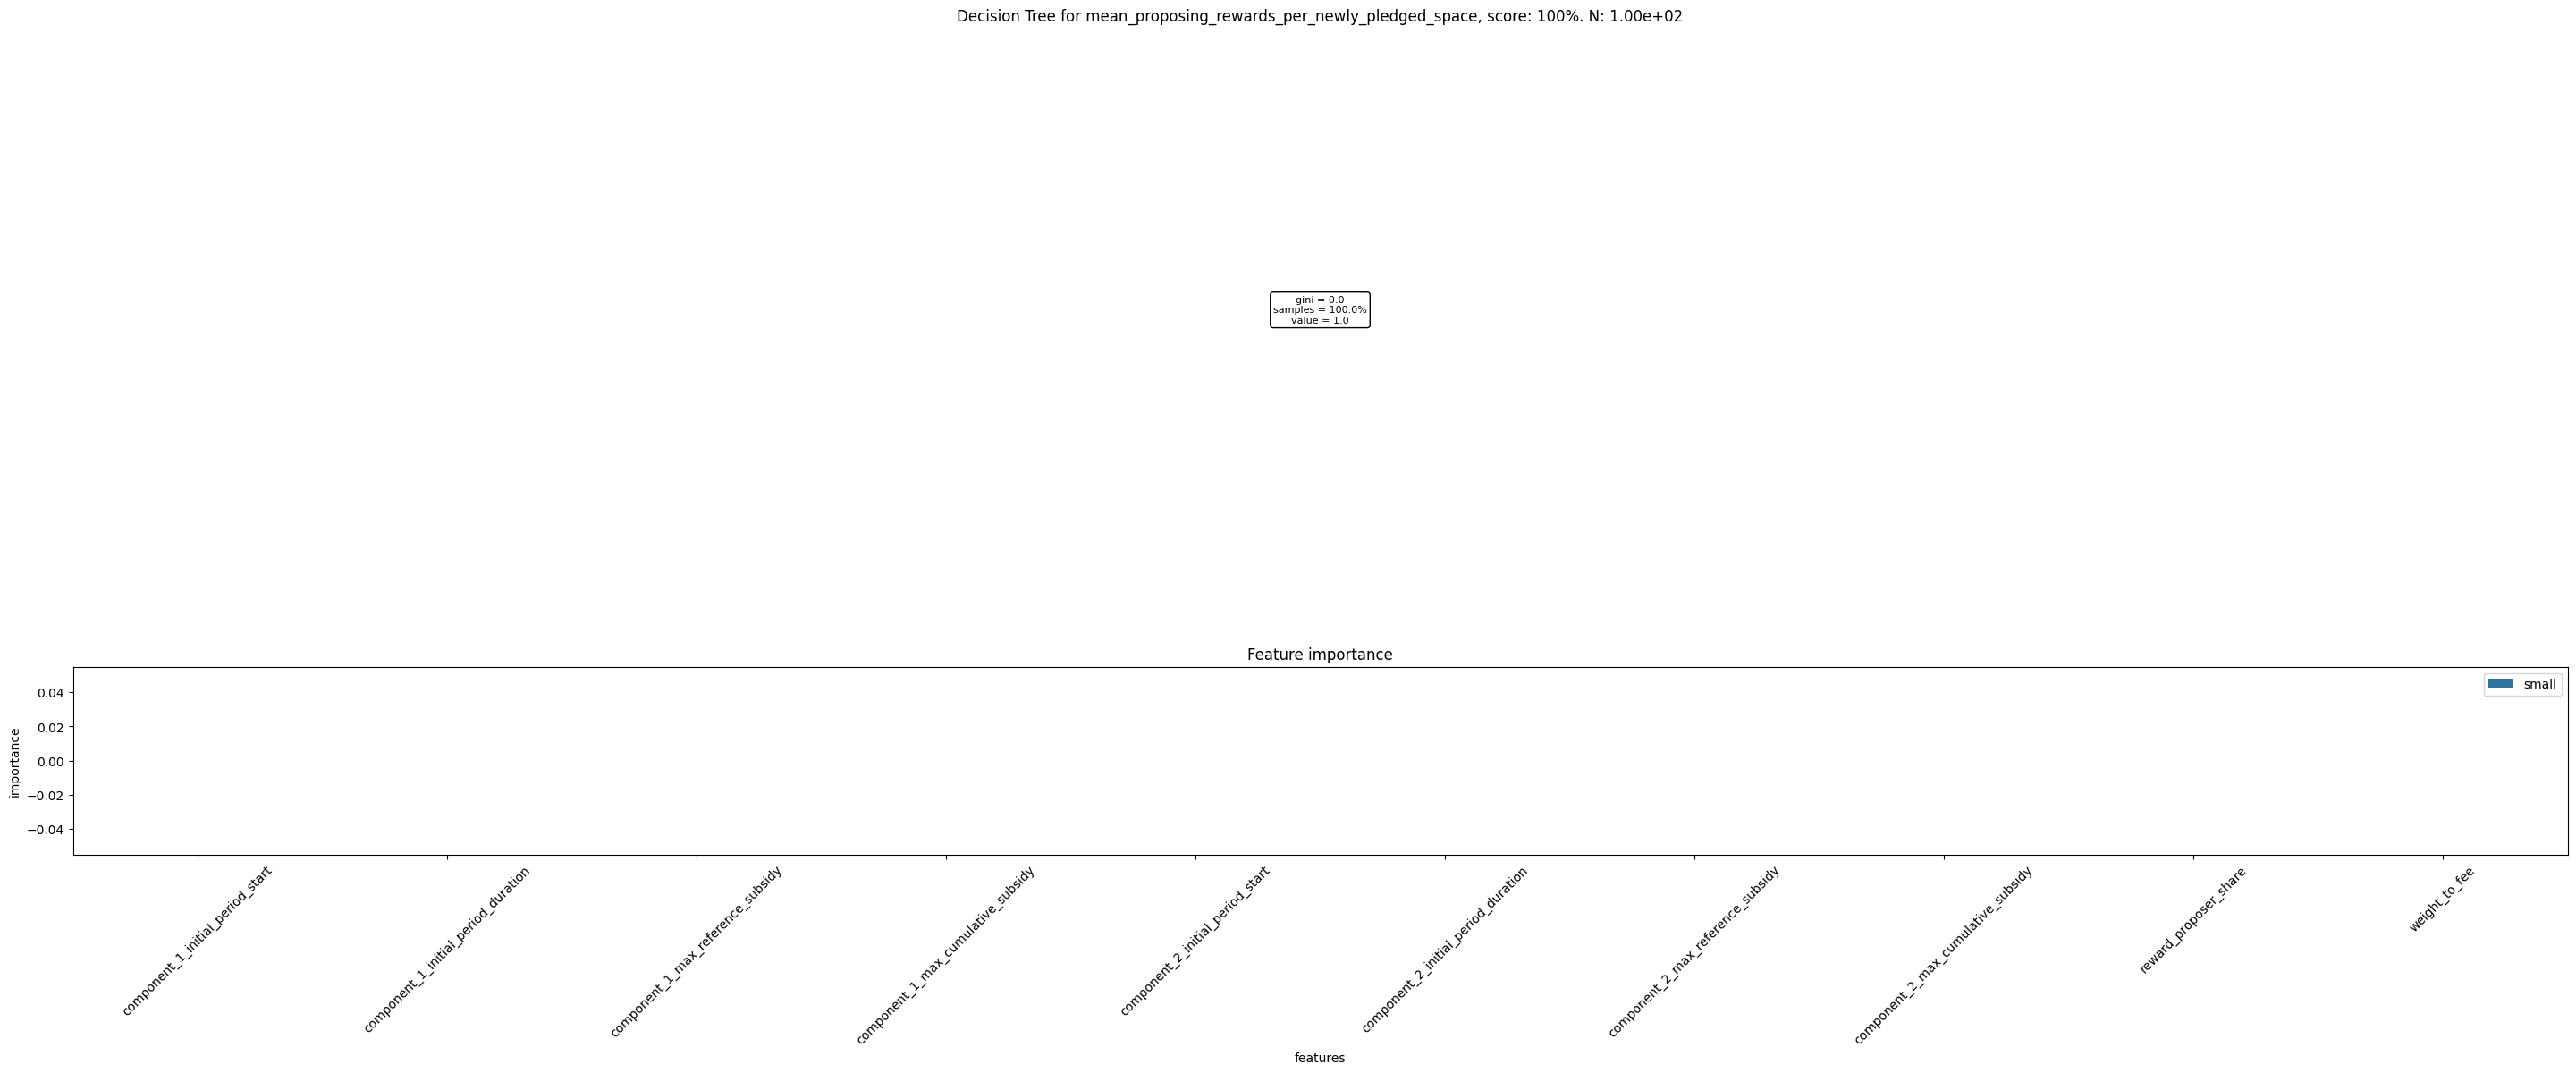

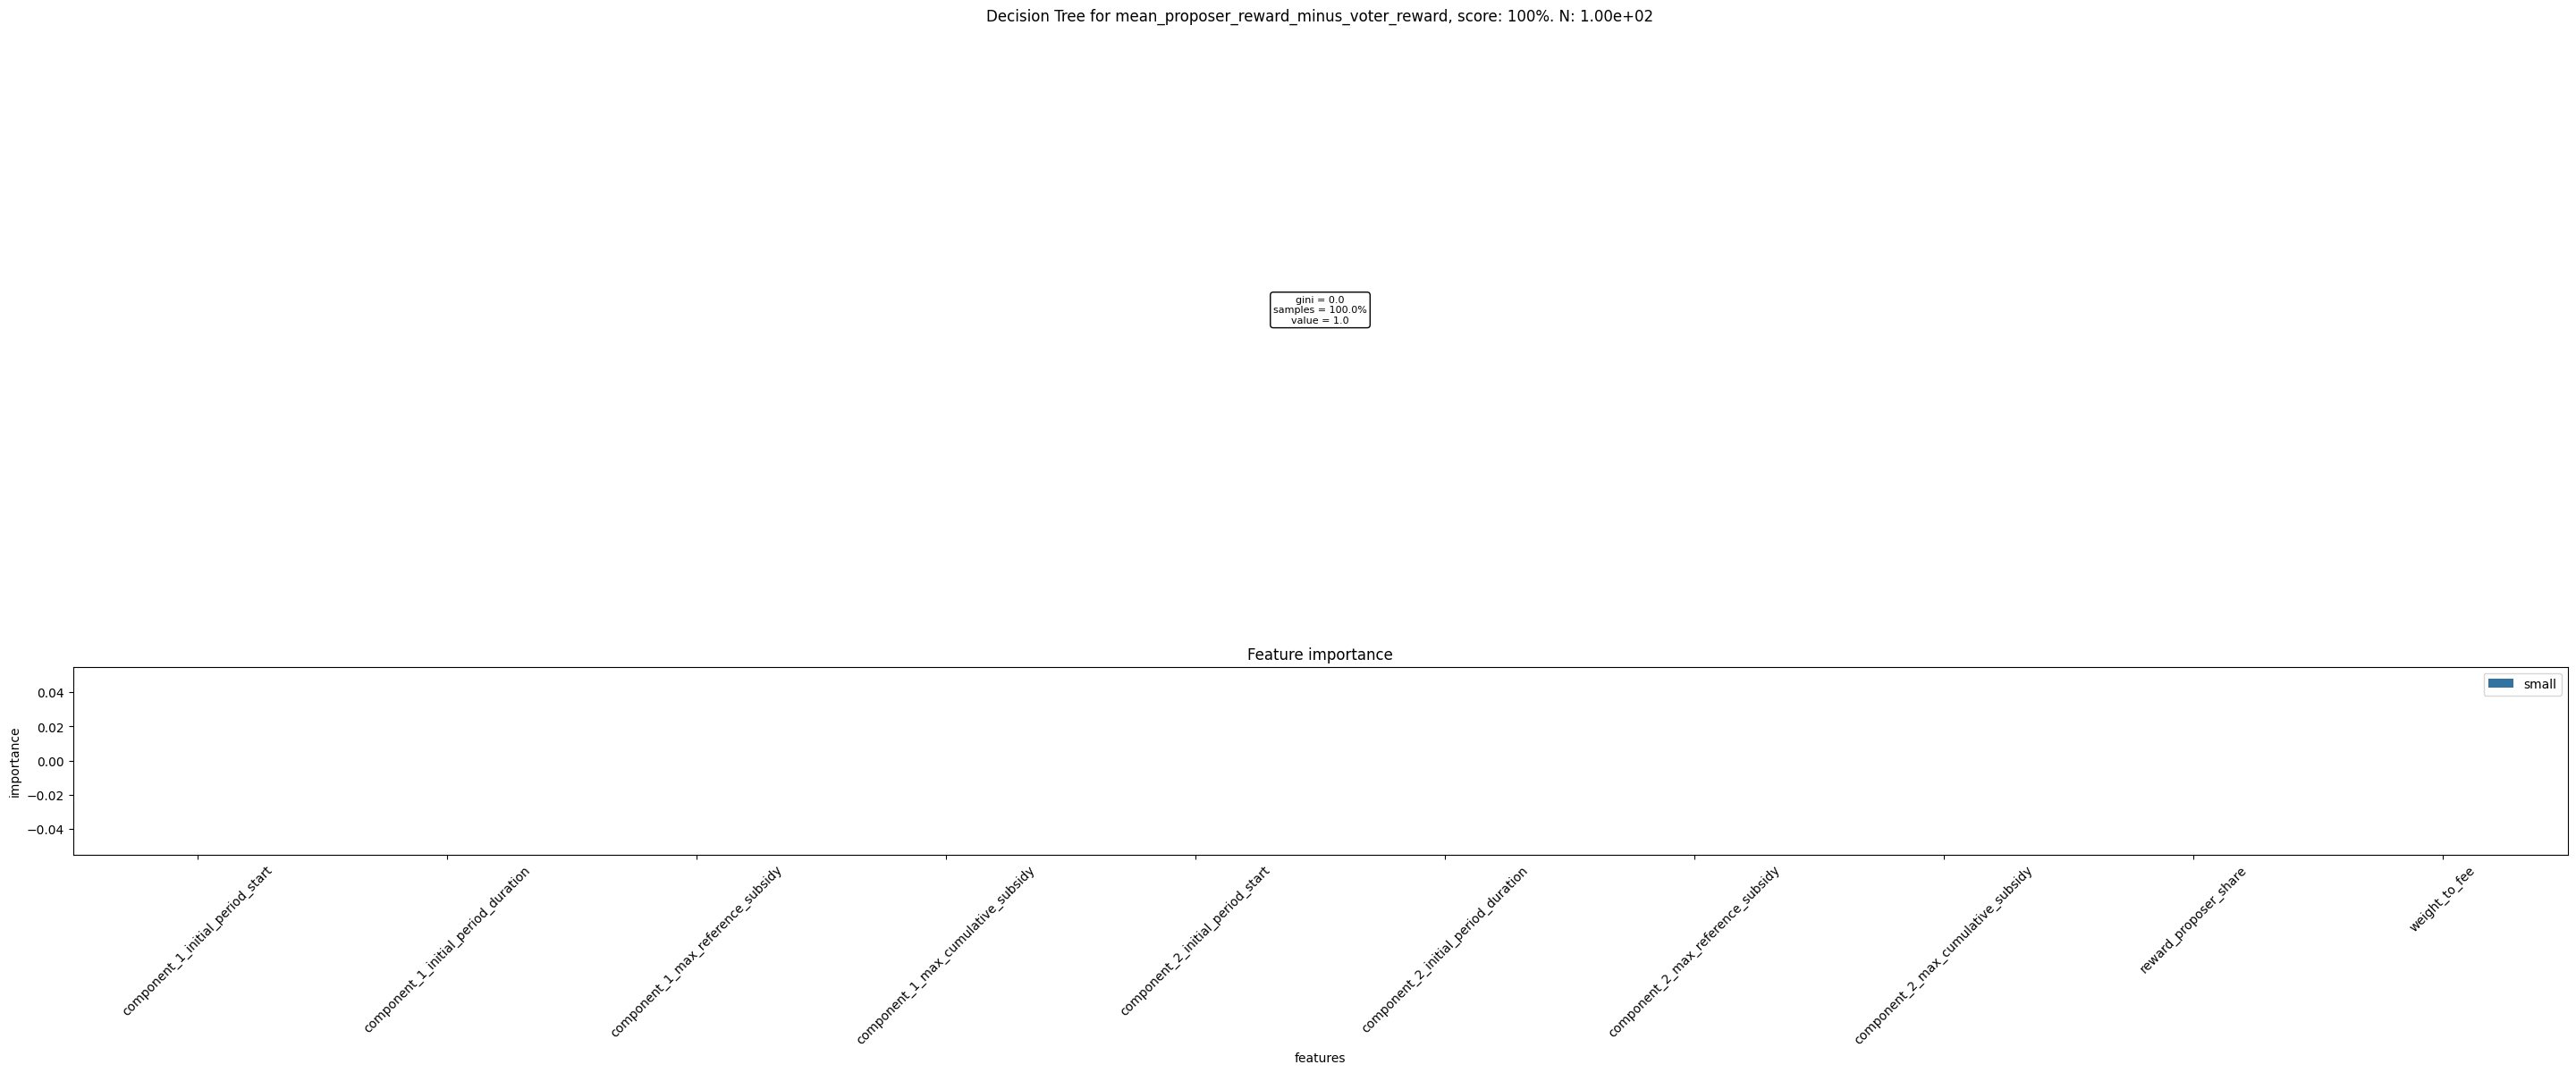

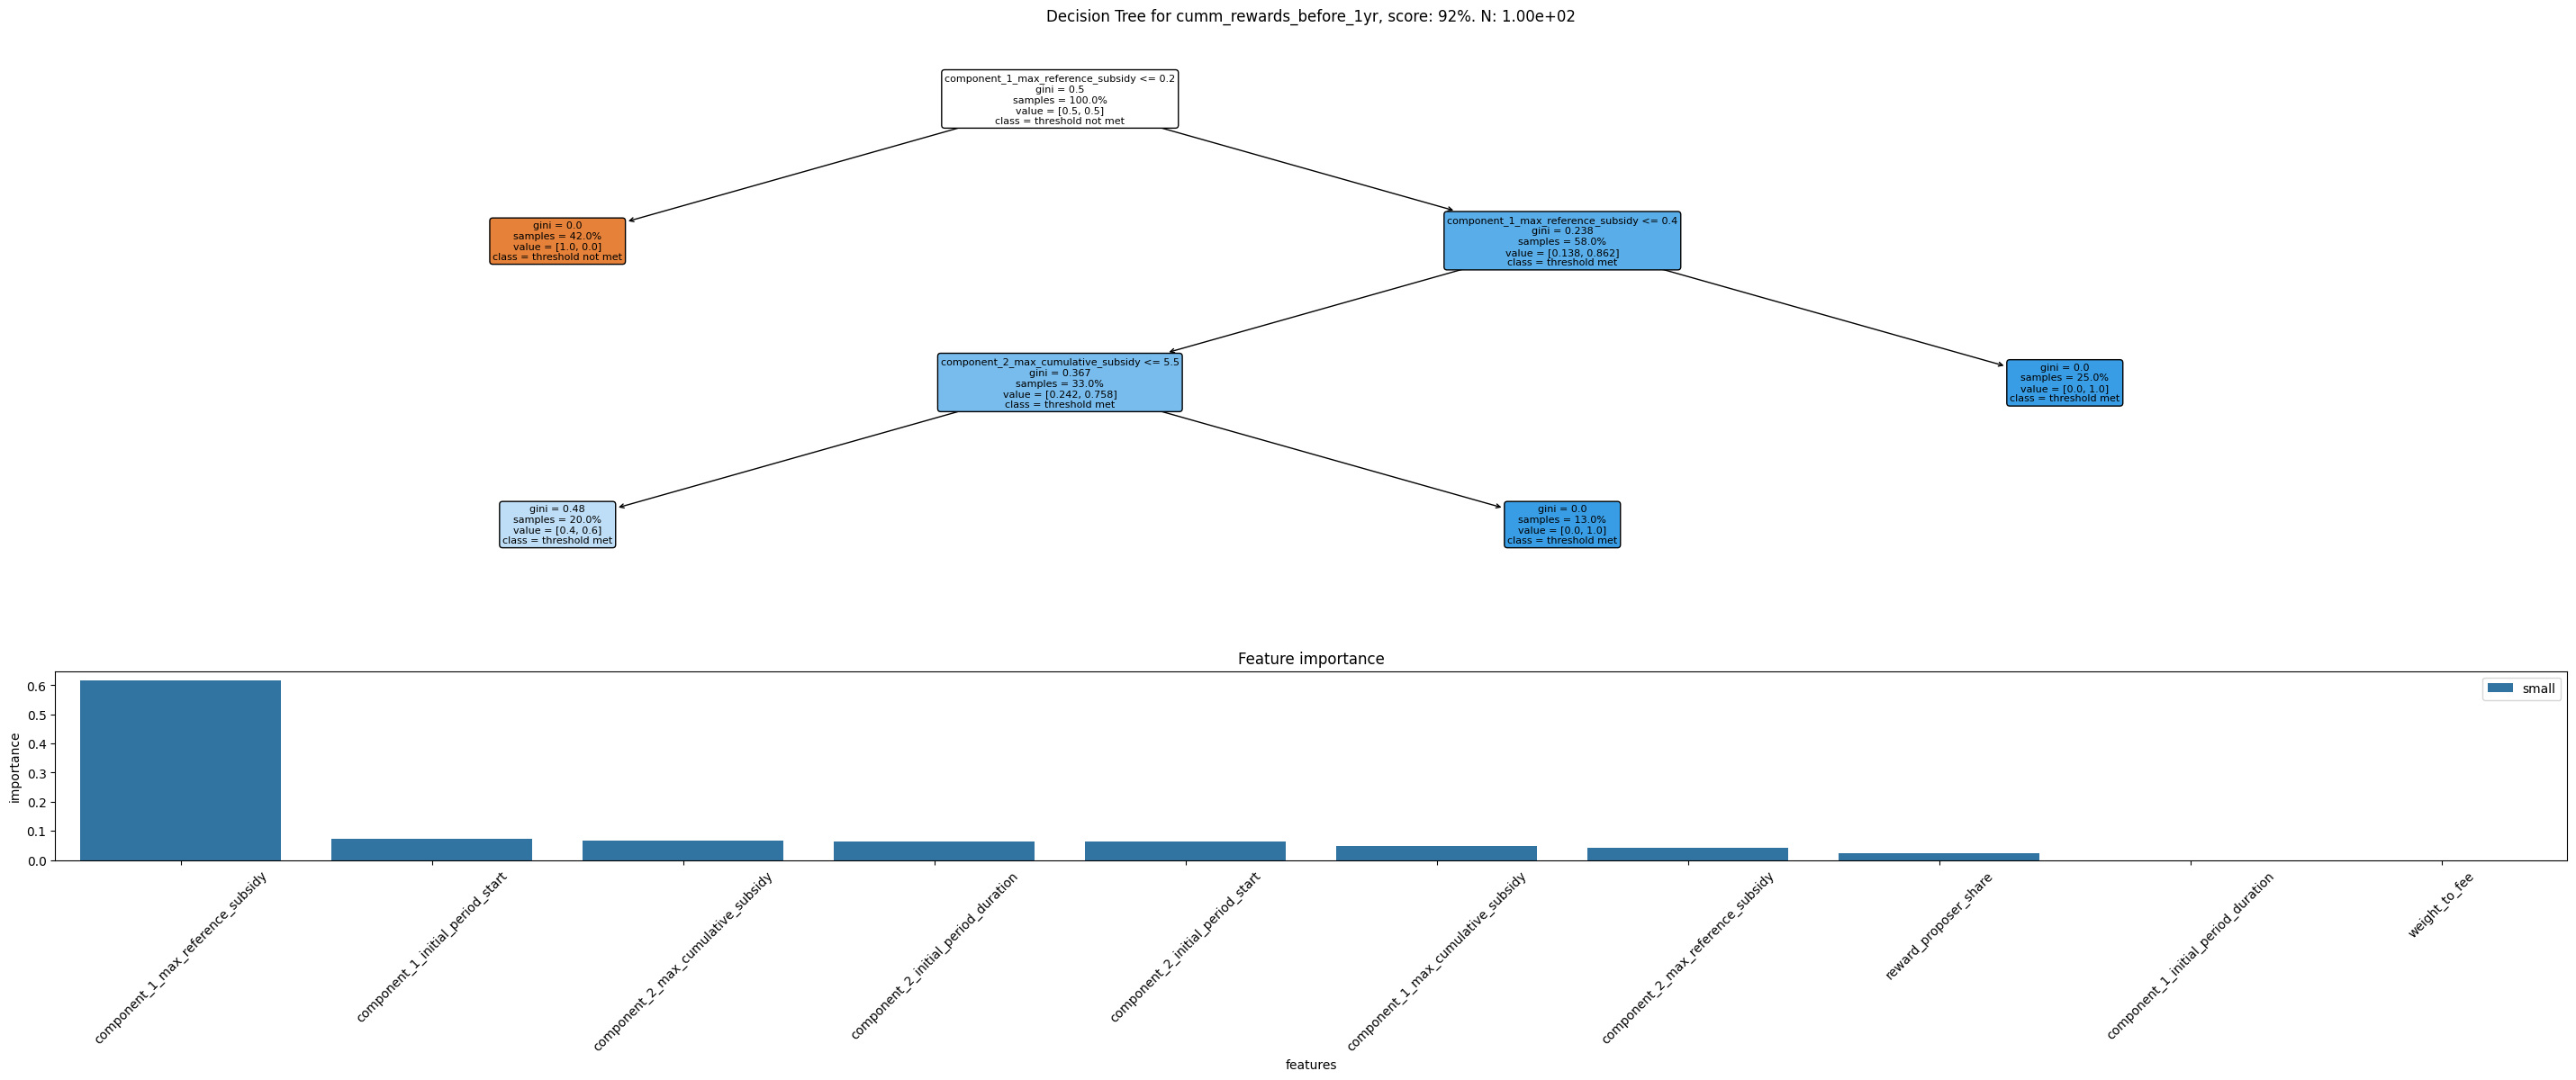

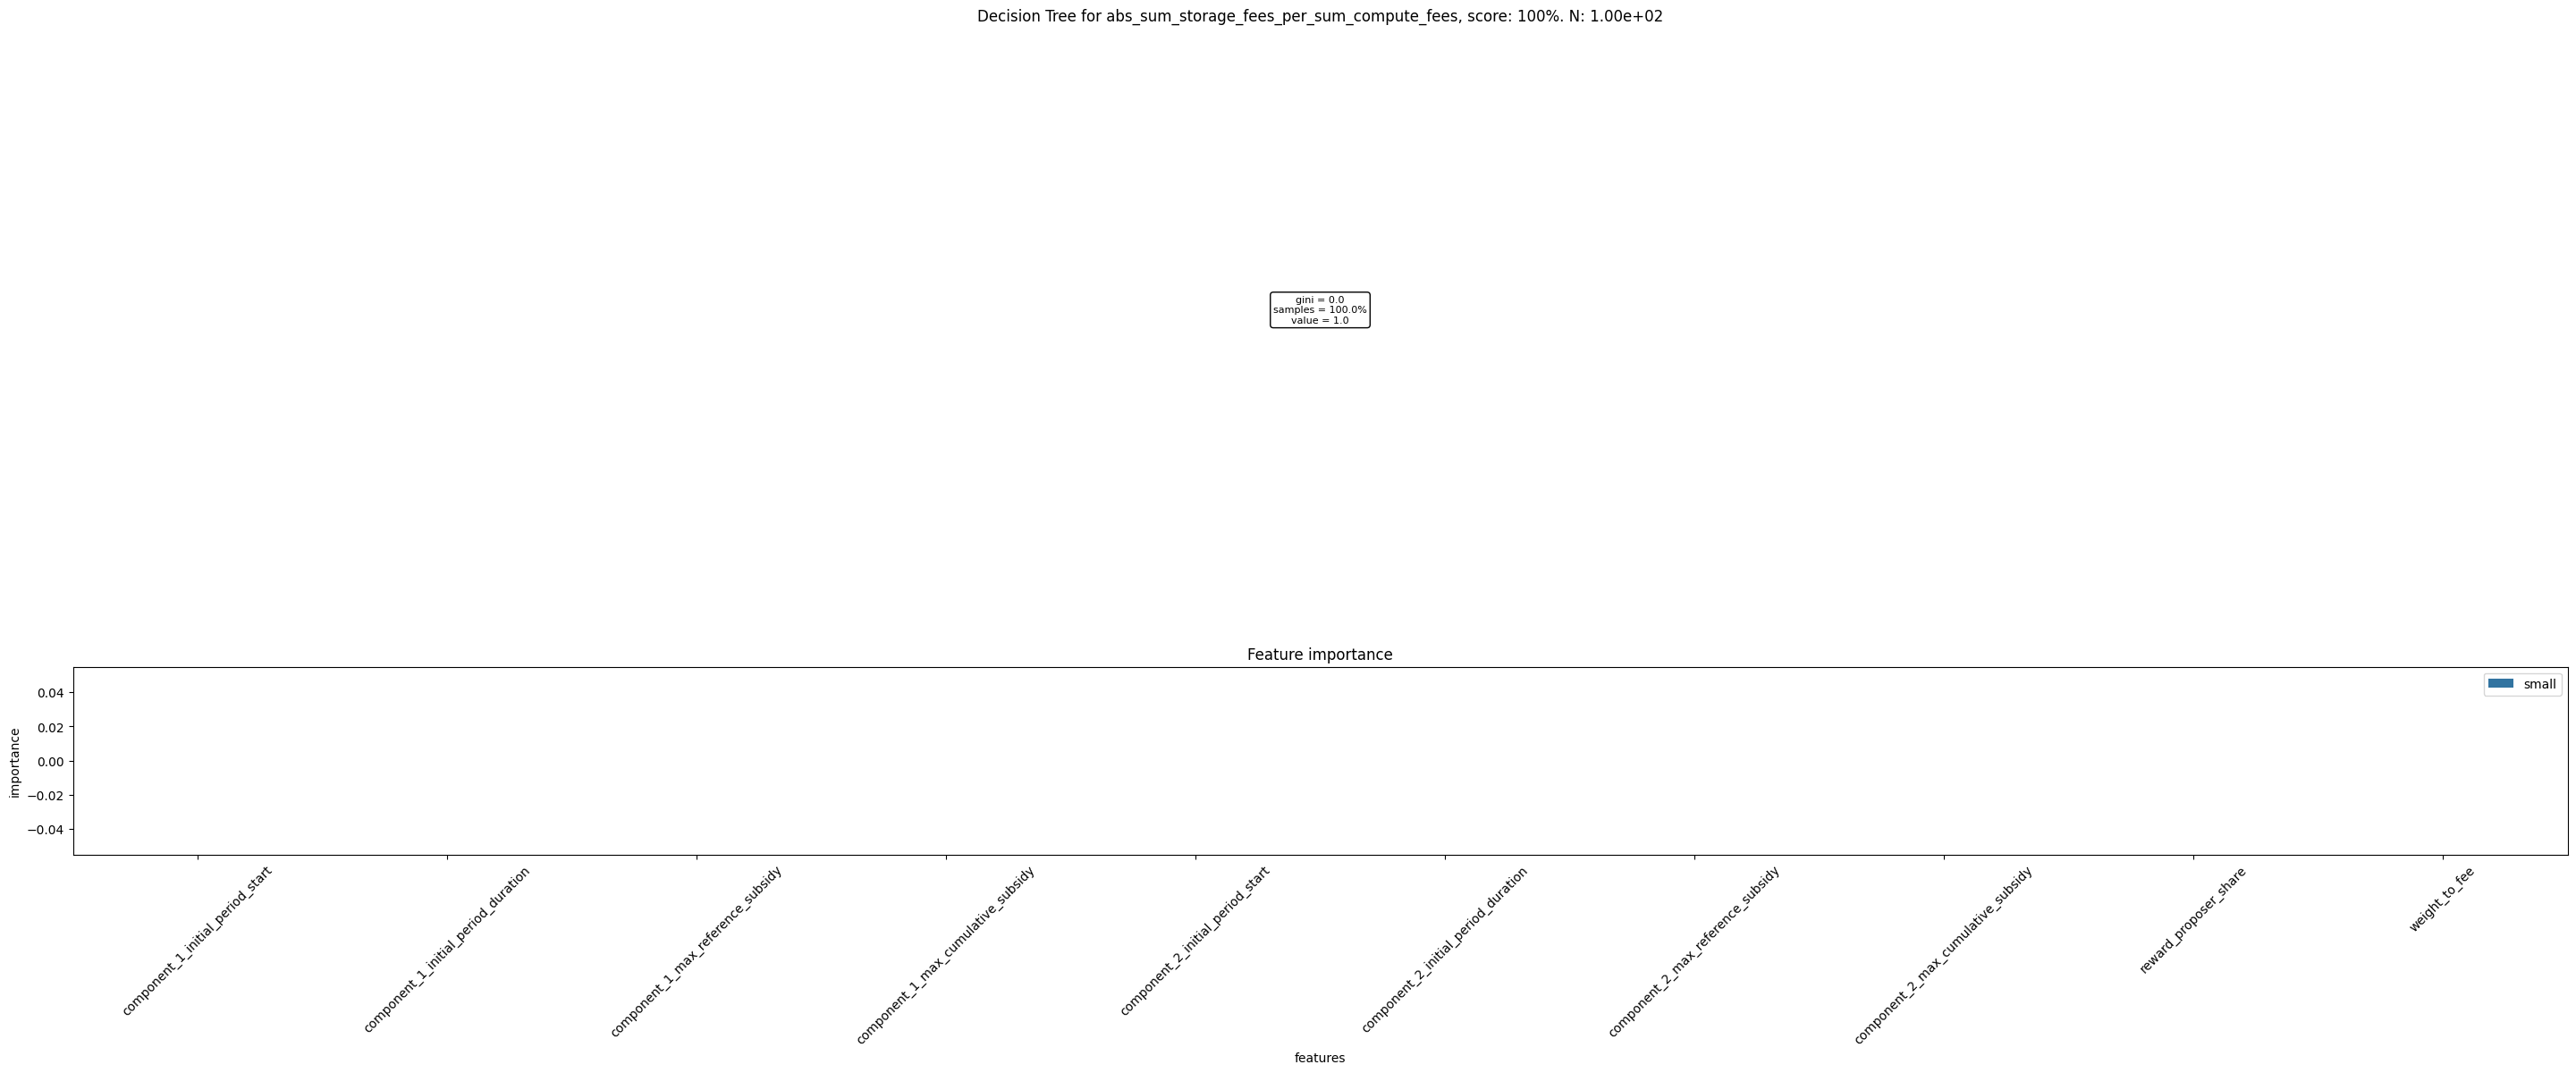

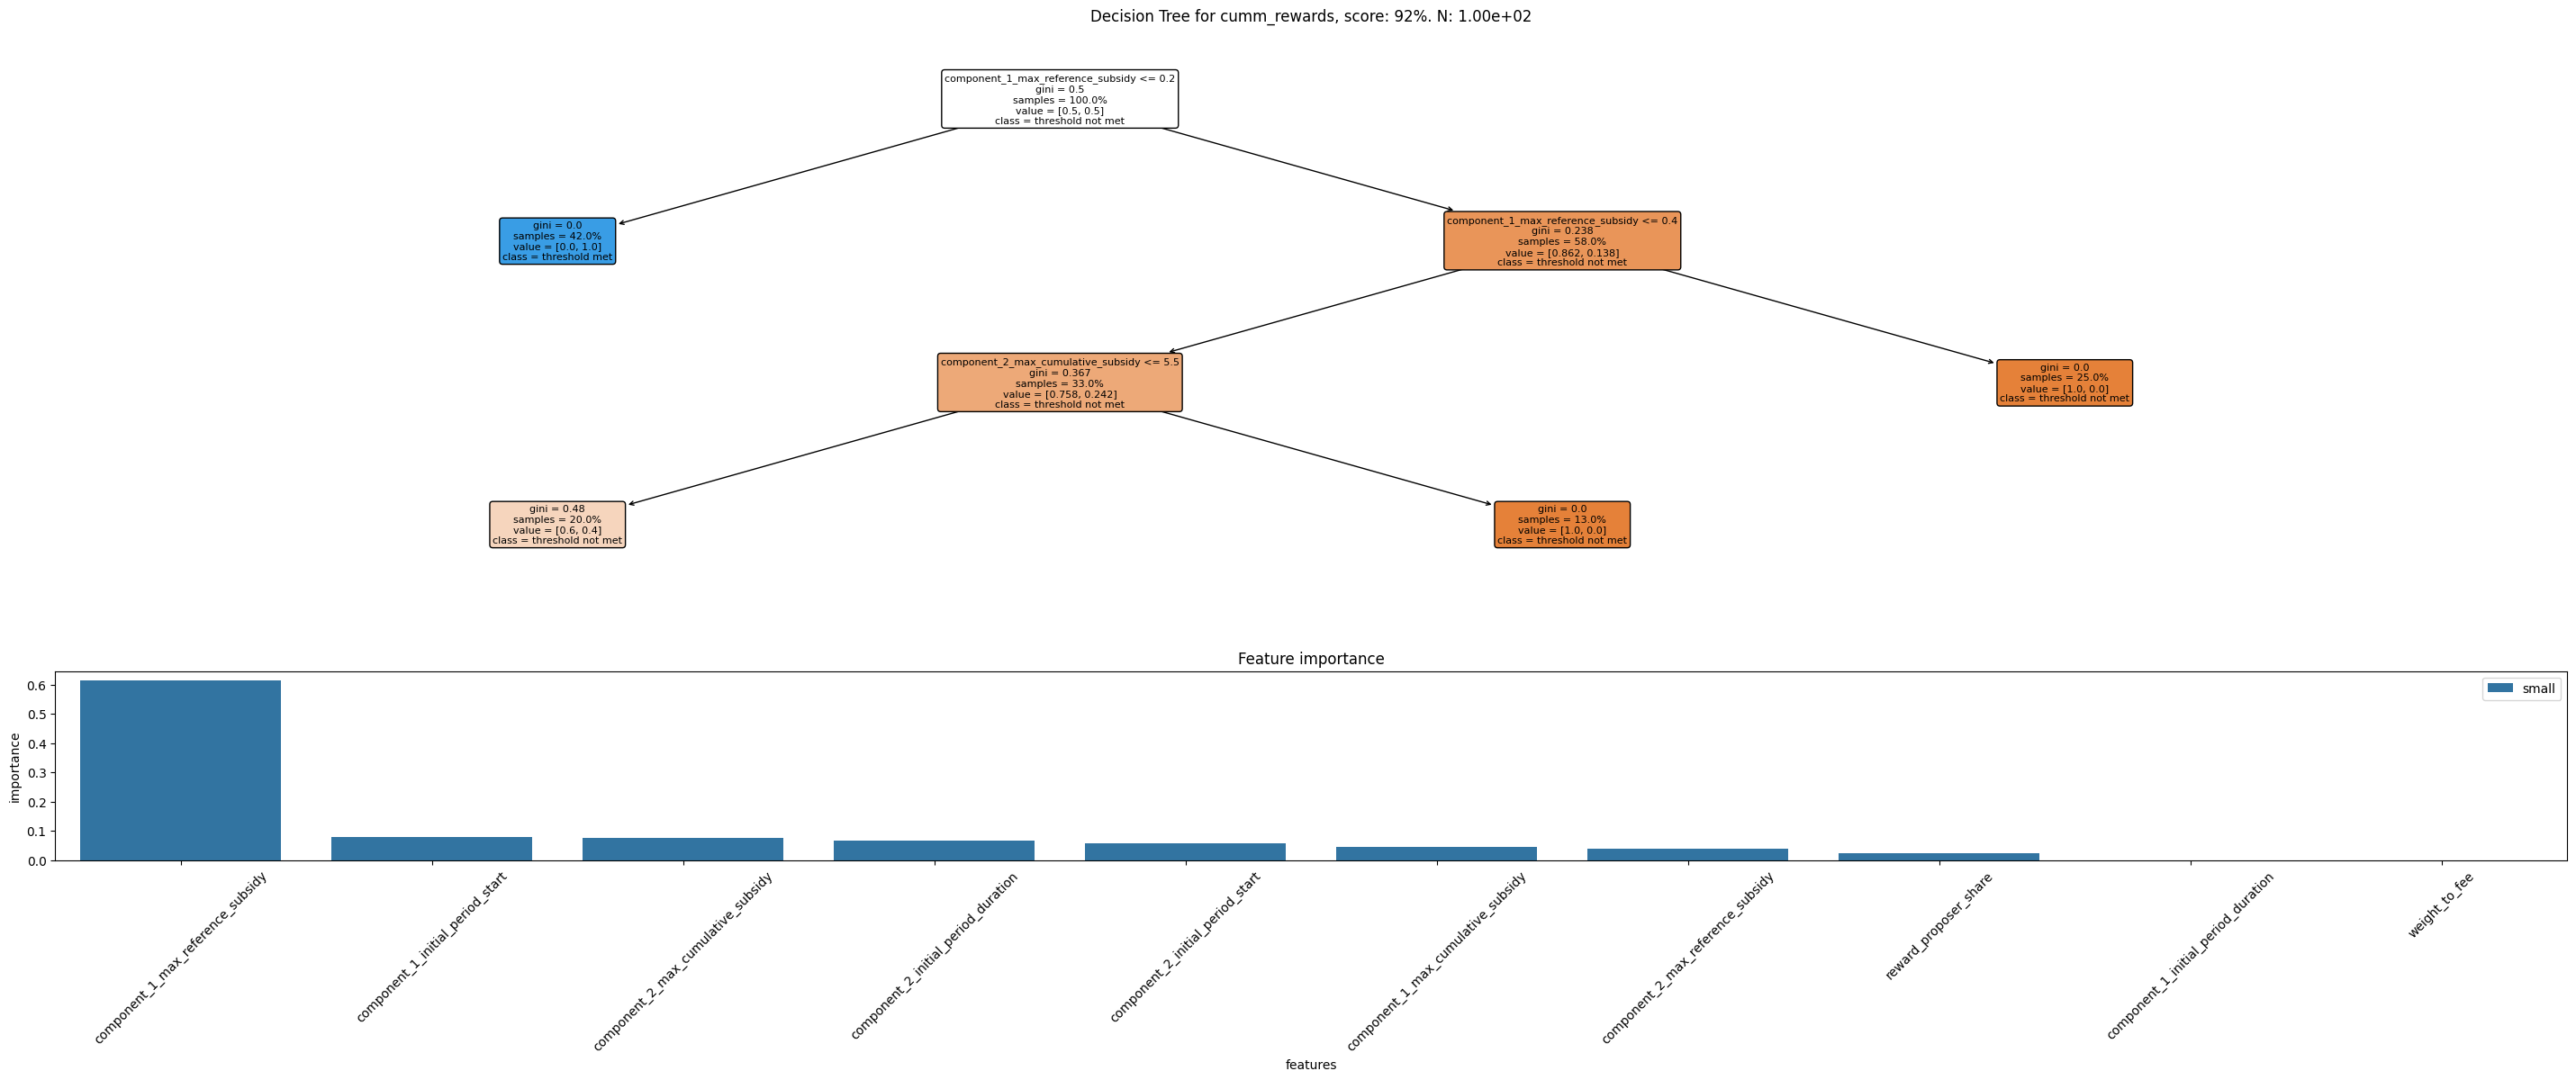

In [3]:
from subspace_model.psuu.plots import create_decision_tree_importances_plot
from subspace_model.psuu.kpis import KPI_functions
import matplotlib.pyplot as plt

col_name = "mean_relative_community_owned_supply"
(kpi_f, kpi_t) = KPI_functions[col_name]

for col_name, (kpi_f, kpi_t) in KPI_functions.items():
    create_decision_tree_importances_plot(agg_df,
                                        col_name =col_name,
                                        success_criteria=kpi_t)
    plt.show()